In [60]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm

import igraph as ig
import networkx as nx

#from matplotlib import rc, rcParams
from matplotlib import cm
from matplotlib.colors import LogNorm

from scipy.integrate import odeint
from HTC_utils import *

from scipy.stats import truncnorm

In [2]:
folder = 'data_r2_0.3/'

# Phase space

In [3]:
r1 = 0.2
r2 = 0.5

Tminus = r1 * r2 / (r1 + r2 + r1*r2)
Tplus = r2 / (2*r2 +1)

xplus = Tplus
yplus = Tplus / r2

xminus = Tminus
yminus = Tminus / r2

print(Tminus)
print(Tplus)

0.12500000000000003
0.25


In [4]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the HTC in the thermodynamic limit.

    Arguments:
        w :  vector of the state variables:
                  w = [x,y]
        t :  time
        p :  vector of the parameters:
                  p = [r1,r2, T]
    """
    x, y = w
    r1, r2, T = p

    # Create f = (x',y'):
    f = [ ( 1-x-y ) * ( r1 + (1-r1)*np.heaviside(x-T, 0) ) - x,
         x-r2*y]
    return f

def solve_ode(p, N=10, stoptime=30.0):
    dt = 0.001

    t = np.arange(0,stoptime+dt,dt)
    
    sol = []

    for _ in range(N):
        a, b = np.random.random(2)
        x0 = a*b
        y0 = b-x0
        w0 = [x0, y0]

        wsol = odeint(vectorfield, w0, t, args=(p,), atol=1e-8, rtol=1e-6)
        sol.append(wsol)
    return sol

def get_streamplot(p):
    r1, r2, T = p
    Y, X = np.mgrid[0:1:500j, 0:1:500j]
    U = (1-X-Y)*(r1 + (1-r1)*np.heaviside(X-T, 0)) - X
    V = X - r2*Y
    
    return [X,Y,U,V]

In [5]:
Ts = [0.7*Tminus, Tminus + 0.5*(Tplus-Tminus), 1.5*Tplus]
titles = [r'$T<T_-$', r'$T_-<T<T_+$', r'$T>T_+$']

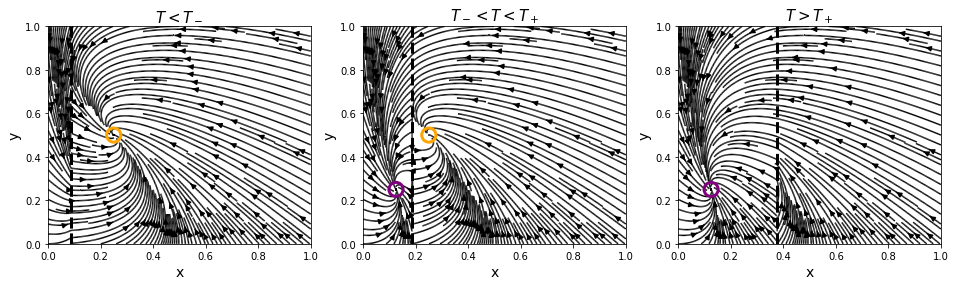

In [6]:
plt.figure(figsize=(16,4))

for j, T in enumerate(Ts):
    p = [r1, r2, T]

    ### GET SOLUTIONS

    # Streamplot
    X, Y, U, V = get_streamplot(p)

    ### PLOT
    # Plot Streamplot
    plt.subplot(1,len(Ts), j + 1)
    plt.title(titles[j], size=15)

    plt.streamplot(X, Y, U, V, density=[8, 1.5], color='k')
    plt.axvline(T, ls='--', c='k', lw=3, zorder=-1)

    plt.xlabel('x', size=14)
    plt.ylabel('y', size=14)
    
    if j>0:
        plt.scatter(xminus, yminus, s=200, zorder=10, facecolors='none', edgecolors='purple', linewidth=3)
    if j<2:
        plt.scatter(xplus, yplus, s=200, zorder=10, facecolors='none', edgecolors='orange', linewidth=3)

    plt.xlim([0, 1])
    plt.ylim([0, 1])

plt.show()

In [178]:
r1 = 0.001
r2 = 0.3

Tminus = r1 * r2 / (r1 + r2 + r1*r2)
Tplus = r2 / (2*r2 +1)

xplus = Tplus
yplus = Tplus / r2

xminus = Tminus
yminus = Tminus / r2

print(Tminus)
print(Tplus)

0.0009956853634251574
0.18749999999999997


# Erdos-Renyi - different p

In [8]:
ps = [0.05, 0.1, 0.2, 0.4, 0.6]
dt = 0.01
steps = int(5e3)
N = int(1e3)

res_hist = []

for p in ps:    
    name = 'hist_N_{}_dt_{}_p_{}.npy'.format(N,np.round(dt,3),np.round(p,2))
    tmp = np.load(folder+name)
    res_hist.append(tmp)

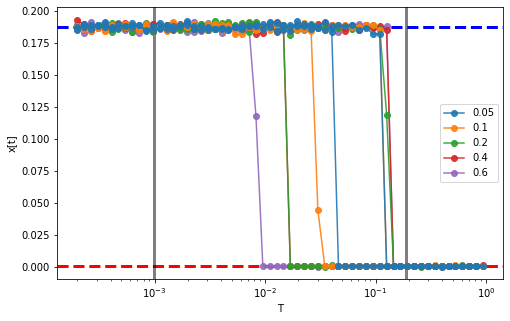

In [9]:
plt.figure(figsize=(8,5))

for i, res in enumerate(res_hist):
    plt.plot(res[0], res[1], '-o', zorder=50-i, label=ps[i], alpha=0.9)

plt.xscale('log')
plt.xlabel('T')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

plt.legend()
plt.show()

# Connectome

In [14]:
W = np.loadtxt('connectome.txt')

N = W.shape[0]

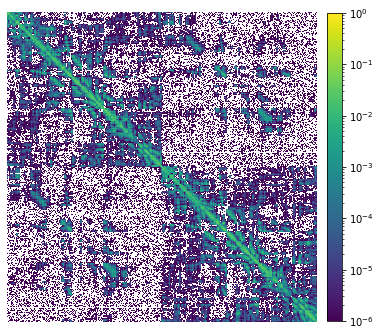

In [15]:
plt.figure(figsize=(6,6))
im = plt.imshow(W, norm=LogNorm(vmin=1e-6, vmax=1))
plt.colorbar(im,fraction=0.046, pad=0.03)
plt.axis('off')
plt.show()

In [16]:
name = 'hist_connectome_dt_{}.npy'.format(np.round(dt,3))
res_connectome_1 = np.load(folder+name)

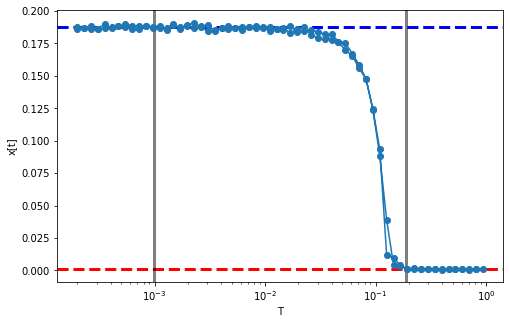

In [17]:
plt.figure(figsize=(8,5))

plt.plot(res_connectome_1[0], res_connectome_1[1], '-o', zorder=2)

plt.xscale('log')
plt.xlabel('T')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

#plt.legend()
plt.show()

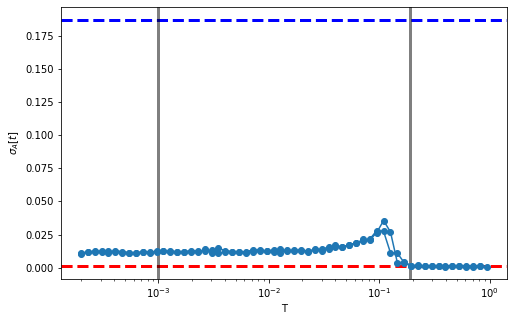

In [18]:
plt.figure(figsize=(8,5))

plt.plot(res_connectome_1[0], res_connectome_1[2], '-o', zorder=2)

plt.xscale('log')
plt.xlabel('T')
plt.ylabel(r'$\sigma_A[t]$')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

#plt.legend()
plt.show()

# Connectome - randomized

In [19]:
Wrand = np.load('randomized/333749_8.txt.npy')

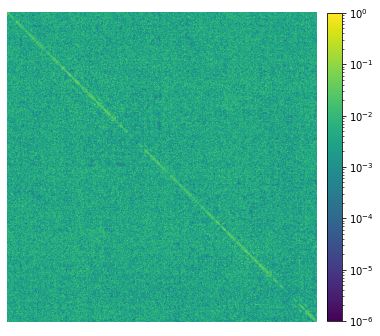

In [20]:
plt.figure(figsize=(6,6))
im = plt.imshow(Wrand, norm=LogNorm(vmin=1e-6, vmax=1))
plt.colorbar(im,fraction=0.046, pad=0.03)
plt.axis('off')
plt.show()

In [21]:
name = 'hist_connectome_rand_dt_{}.npy'.format(np.round(dt,3))
res_connectome_rand = np.load(folder+name)

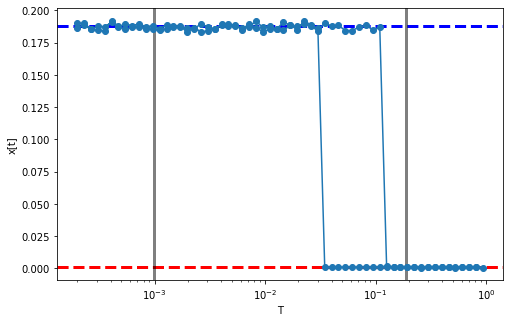

In [22]:
plt.figure(figsize=(8,5))

plt.plot(res_connectome_rand[0], res_connectome_rand[1], '-o', zorder=2)

plt.xscale('log')
plt.xlabel('T')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

#plt.legend()
plt.show()

# Connectome - binarized

In [23]:
Wbin = np.loadtxt('connectome.txt')
Wbin = (Wbin>0).astype(int)

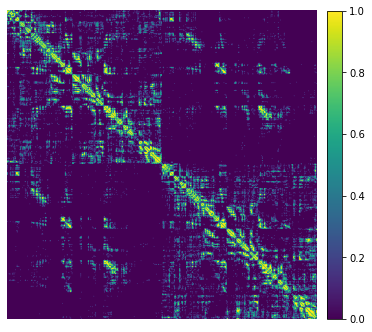

In [24]:
plt.figure(figsize=(6,6))
im = plt.imshow(Wbin)
plt.colorbar(im,fraction=0.046, pad=0.03)
plt.axis('off')
plt.show()

In [25]:
name = 'hist_connectome_bin_dt_{}.npy'.format(np.round(dt,3))
res_connectome_bin = np.load(folder+name)

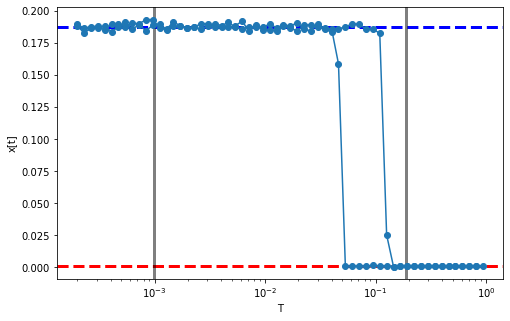

In [26]:
plt.figure(figsize=(8,5))

plt.plot(res_connectome_bin[0], res_connectome_bin[1], '-o', zorder=2)

plt.xscale('log')
plt.xlabel('T')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

#plt.legend()
plt.show()

# Power spectrum

In [27]:
def Psup(w, r1, r2):
    return ( (2*r2 * (1 + r2 + r2**2 + w**2))
           / (1 + 2*r2) / ( (1 + 2*r2)**2 + (2 + r2**2)*w**2 + w**4) )

def Psub(w,r1,r2):
    return ( 2*r1*r2 * (r1**2 + r1*r2 + r2**2 + w**2) /
          (r1 + r2 + r1*r2)  / ((r1 + r2 + r1*r2)**2 + (1 + r1**2 + r2**2)*w**2 + w**4 ))

def my_power_spectrum(x, dt, nperseg=int(1e4)):
    return signal.welch(x, nperseg = nperseg, fs = 1/dt, scaling = 'density')

def w_max(r1, r2):
    return np.sqrt( (1+r1+r2)*np.sqrt(r1*r2) - r1**2 - r2**2 - r1*r2 )

def get_dynamical_range(Exc, stimuli, low=0.1, high=0.9):
    '''
    Compute the dynamical range
    '''
    delta = np.zeros(len(Exc))
    
    for i in range(len(Exc)):        
        # Get A90 and A10
        Amax, Amin = np.max(Exc[i]), np.min(Exc[i])
        A10, A90 = (Amax-Amin)*low + Amin, (Amax-Amin)*high + Amin
        # Get corresponent index
        s10 = np.where( (A10 > Exc[i][:-1])*(A10 < Exc[i][1:]) )[0][-1]
        s90 = np.where( (A90 > Exc[i][:-1])*(A90 < Exc[i][1:]) )[0][0]
        # Get the s value by linear interpolation
        s10 = (stimuli[s10]-stimuli[s10+1]) / (Exc[i][s10]-Exc[i][s10+1]) * (A10 - Exc[i][s10+1]) + stimuli[s10+1]
        s90 = (stimuli[s90]-stimuli[s90+1]) / (Exc[i][s90]-Exc[i][s90+1]) * (A90 - Exc[i][s90+1]) + stimuli[s90+1]
        
        # Dynamical range
        delta[i] = 10*np.log10(s90 / s10)
        
    return delta

In [62]:
Tlow = 1e-3
Tcrit = res_connectome_1[0][np.argmax(res_connectome_1[2])]
Thigh = 3e-1

Ts = [Tlow, Tcrit, Thigh]
print(Ts)

[0.001, 0.10919523667238883, 0.3]


# Connectome

In [179]:
dt = 0.05
steps = int(5e5)

dT = 0.1
Ts = np.arange(0, 1.5, dT) * Tplus

res_ps_various = []

for T in Ts:
    name = 'traj_long_connectome_dt_{}_steps_{}_T_{}.npy'.format(np.round(dt,3),steps,np.round(np.log10(T),2))
    print(name)
    x = np.load(folder+name)
    
    res_ps_various.append(x)

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


traj_long_connectome_dt_0.05_steps_500000_T_-inf.npy
traj_long_connectome_dt_0.05_steps_500000_T_-1.73.npy
traj_long_connectome_dt_0.05_steps_500000_T_-1.43.npy
traj_long_connectome_dt_0.05_steps_500000_T_-1.25.npy
traj_long_connectome_dt_0.05_steps_500000_T_-1.12.npy
traj_long_connectome_dt_0.05_steps_500000_T_-1.03.npy
traj_long_connectome_dt_0.05_steps_500000_T_-0.95.npy
traj_long_connectome_dt_0.05_steps_500000_T_-0.88.npy
traj_long_connectome_dt_0.05_steps_500000_T_-0.82.npy
traj_long_connectome_dt_0.05_steps_500000_T_-0.77.npy
traj_long_connectome_dt_0.05_steps_500000_T_-0.73.npy
traj_long_connectome_dt_0.05_steps_500000_T_-0.69.npy
traj_long_connectome_dt_0.05_steps_500000_T_-0.65.npy
traj_long_connectome_dt_0.05_steps_500000_T_-0.61.npy
traj_long_connectome_dt_0.05_steps_500000_T_-0.58.npy


In [180]:
spectra = []

for i, res in enumerate(res_ps_various):
    spectrum = []
    
    for x in res:
        f, S = my_power_spectrum(x, dt, nperseg=int(9e4))
        spectrum.append(S)
    spectra.append(np.mean(spectrum, axis=0))

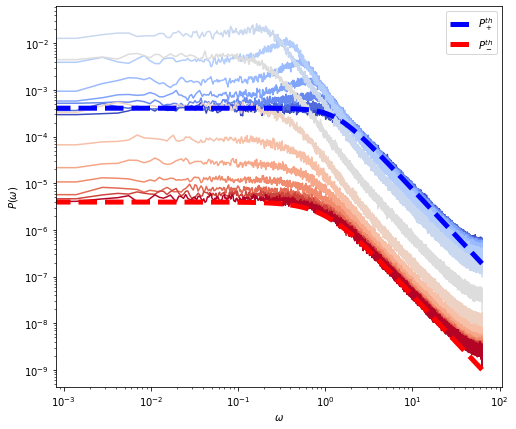

In [182]:
cmap = cm.get_cmap('coolwarm', 15)

plt.figure(figsize=(8,7))

for i, spectrum in enumerate(spectra):
    plt.plot(2*np.pi*f, spectrum, c=cmap(i))
    
plt.plot(2*np.pi*f, Psup(2*np.pi*f,r1,r2) / N / 0.5, '--', label=r'$P_+^{th}$', lw=lw, c='blue')
plt.plot(2*np.pi*f, Psub(2*np.pi*f,r1,r2) / N / 0.5, '--', label=r'$P_-^{th}$', lw=lw, c='r')

plt.xlabel(r'$\omega$')
plt.ylabel(r'$P(\omega)$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

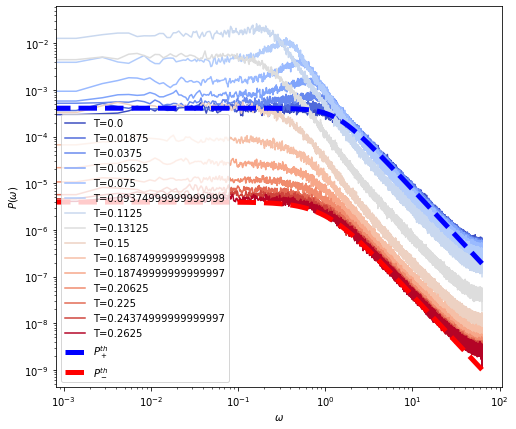

In [169]:
cmap = cm.get_cmap('coolwarm', 15)

plt.figure(figsize=(8,7))

for i, spectrum in enumerate(spectra):
    plt.plot(2*np.pi*f, spectrum, c=cmap(i), label='T='+str(Ts[i]))
    
plt.plot(2*np.pi*f, Psup(2*np.pi*f,r1,r2) / N / 0.5, '--', label=r'$P_+^{th}$', lw=lw, c='blue')
plt.plot(2*np.pi*f, Psub(2*np.pi*f,r1,r2) / N / 0.5, '--', label=r'$P_-^{th}$', lw=lw, c='r')

plt.xlabel(r'$\omega$')
plt.ylabel(r'$P(\omega)$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

# Dynamic range

In [10]:
r1 = 0.001
r2 = 0.3

Tminus = r1 * r2 / (r1 + r2 + r1*r2)
Tplus = r2 / (2*r2 +1)

xplus = Tplus
yplus = Tplus / r2

xminus = Tminus
yminus = Tminus / r2

print(Tminus)
print(Tplus)

0.0009956853634251574
0.18749999999999997


In [11]:
data = np.loadtxt('results/connectome_998_0.0_1.5_0.03_50_0.36_0_observables.txt')
stim = np.loadtxt('results/connectome_998_0.0_1.5_0.03_50_0.36_0_stimulated.txt')

In [12]:
Tmin = 0.0
Tmax = 1.5
dT = 0.03

Trange = np.arange(Tmin, Tmax+dT, dT)*Tplus

Nstim = 50

stimuli = np.logspace(-5, 0, Nstim, endpoint=True)

stimulated = stim[len(stim)//2:] * 10

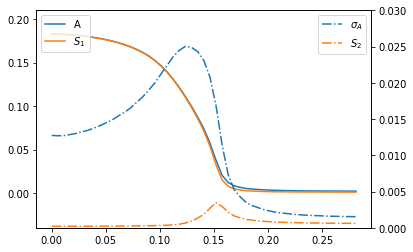

In [13]:
fig, ax = plt.subplots()

ax.plot(Trange, data[5], label='A')
ax.plot(Trange, data[8], label=r'$S_1$')
ax.set_ylim([-0.04,0.21])
ax.legend(loc=2)

ax2=ax.twinx()
ax2.plot(Trange, data[6], '-.', label=r'$\sigma_A$')
ax2.plot(Trange, data[9], '-.', label=r'$S_2$')
ax2.set_ylim([0,0.03])
ax2.legend(loc=0)

plt.show()

In [37]:
dyn_range = get_dynamical_range(stimulated, stimuli)

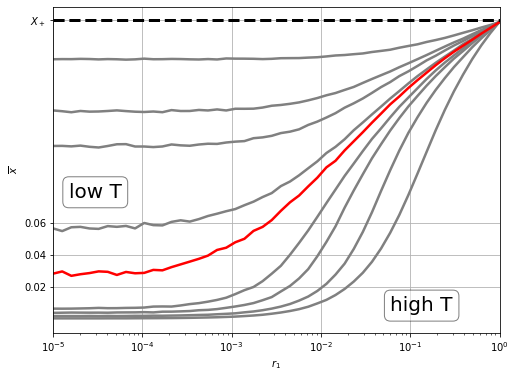

In [38]:
plt.figure(figsize=(8,6))

cm1 = cm.get_cmap('jet')
fact = 45

to_print = [15, 20, 22, 25, 28, 30, 35, 50]

for i in to_print:
        #plt.plot(stimuli, stimulated[i], c=cm1(i/fact), label=str(i))
        plt.plot(stimuli, stimulated[i], c='gray', lw=2.5)
        
plt.plot(stimuli, stimulated[np.argmax(dyn_range)], c='red', lw=2.5)
        
plt.axhline(xplus, c='k', lw=3, ls='--')  

plt.ylabel(r'$\overline{x}$')
plt.xlabel(r'$r_1$')

plt.grid()
plt.xscale('log')

xpos = np.arange(0.02, 0.08, 0.02)
xtick = np.round(xpos,3).astype(str)
xpos = list(xpos) + [xplus]
xtick = list(xtick) + [r'$X_+$']

plt.yticks(ticks = xpos, labels=xtick)

plt.xlim([1e-5, 1e0])
#plt.legend()
plt.text(1.5e-5, 0.076, r'low T', size=20, bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.text(6e-2, 0.005, r'high T', size=20, bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.show()
#plt.tight_layout()
#plt.savefig("figures/stimulated.pdf")

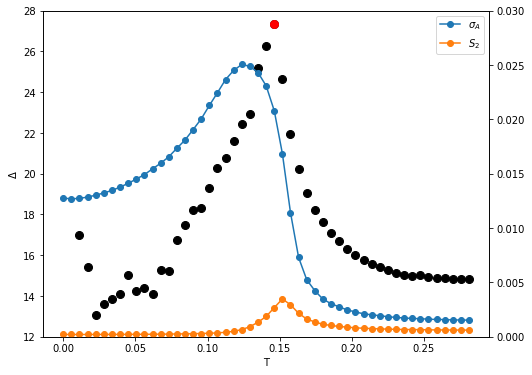

In [39]:
fig, ax = plt.subplots(figsize=(8,6))

#ax = plt.subplots()

ax.plot(Trange, dyn_range, 'o', c='k', ms=8)

ax.plot(Trange[np.argmax(dyn_range)], dyn_range[np.argmax(dyn_range)], 'o', c='red', ms=8)

ax.set_xlabel('T')
ax.set_ylabel(r'$\Delta$')
ax.set_ylim([12,28])

ax2 = ax.twinx()
ax2.plot(Trange, data[6], '-o', label=r'$\sigma_A$')
ax2.plot(Trange, data[9], '-o', label=r'$S_2$')
ax2.set_ylim([0,0.03])
ax2.legend(loc=0)

plt.show()

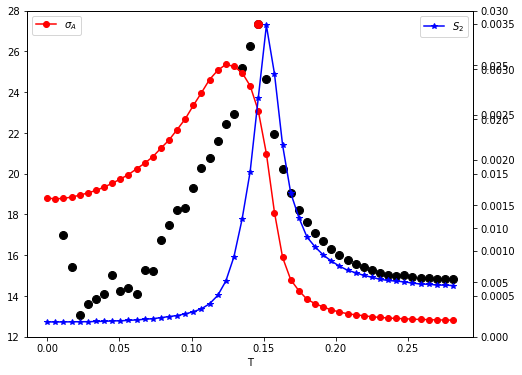

In [129]:
fig, ax = plt.subplots(figsize=(8,6))

#ax = plt.subplots()

ax.plot(Trange, dyn_range, 'o', c='k', ms=8)

ax.plot(Trange[np.argmax(dyn_range)], dyn_range[np.argmax(dyn_range)], 'o', c='red', ms=8, label=r'$\Delta$')

ax.set_xlabel('T')
#ax.set_ylabel(r'$\Delta$')
ax.set_ylim([12,28])

ax2 = ax.twinx()
ax2.plot(Trange, data[6], '-o', label=r'$\sigma_A$', c='red')
#ax2.plot(Trange, data[9], '-o', label=r'$S_2$')
ax2.set_ylim([0,0.03])
ax2.legend(loc=2)

ax3 = ax.twinx()
#ax2.plot(Trange, data[6], '-o', label=r'$\sigma_A$')
ax3.plot(Trange, data[9], '-*', label=r'$S_2$', c='blue')
#ax2.set_ylim([0,0.03])
ax3.legend(loc=0)

plt.show()